In [1]:
import pandas as pd

In [36]:
qes_df = pd.read_csv("../data/qes-dec25qtr-tables.csv", low_memory=False)

qes_df.head()


,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,QEMQ.SAAB1A,1989.03,14.16,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
1,QEMQ.SAAB1A,1989.06,14.26,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
2,QEMQ.SAAB1A,1989.09,14.24,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
3,QEMQ.SAAB1A,1989.12,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
4,QEMQ.SAAB1A,1990.03,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN


The dataset includes a mix of numeric values and descriptive labels, which is common in official statistical releases. I disabled low memory parsing to ensure columns were read consistently before cleaning

In [37]:
qes_df.shape

(197430, 13)

In [38]:
qes_df.columns

Index(['Series_reference', 'Period', 'Data_value', 'STATUS', 'UNITS',
       'MAGNTUDE', 'Subject', 'Group', 'Series_title_1', 'Series_title_2',
       'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='str')

The QES dataset contains multiple tables combined into a single file. 
Each row represents a specific statistical series identified by descriptive title columns.
Before analysis, it is necessary to filter the dataset to focus only on earnings-related information.


In [39]:
qes_df["Series_title_1"].value_counts().head(10)

Series_title_1
Total All Industries                          12876
Forestry and Mining                            8732
Manufacturing                                  8732
Electricity, Gas, Water and Waste Services     8732
Construction                                   8732
Wholesale Trade                                8732
Retail Trade                                   8732
Accommodation and Food Services                8732
Transport, Postal and Warehousing              8732
Information Media and Telecommunications       8732
Name: count, dtype: int64

In [40]:
earnings_df = qes_df[
    qes_df["Series_title_1"]
    .str.contains("earn", case=False, na=False)
]

earnings_df.shape

(296, 13)

I filtered the dataset to retain only rows related to earnings, as this project focuses on salary analysis.
This significantly reduced the dataset size and made the analysis more targeted.

In [41]:
list(earnings_df.columns)

['Series_reference',
 'Period',
 'Data_value',
 'STATUS',
 'UNITS',
 'MAGNTUDE',
 'Subject',
 'Group',
 'Series_title_1',
 'Series_title_2',
 'Series_title_3',
 'Series_title_4',
 'Series_title_5']

The dataset does not include a direct units column. 
Instead, the magnitude field provides information about the scale of the data values, which needs to be considered during interpretation.

In [42]:
print(qes_df.columns.tolist())

['Series_reference', 'Period', 'Data_value', 'STATUS', 'UNITS', 'MAGNTUDE', 'Subject', 'Group', 'Series_title_1', 'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5']


During initial inspection, I found that the dataset structure differed from typical documentation examples. 
Therefore, column names were inspected directly before selecting relevant fields for analysis.

In [43]:
earnings_df[[
    "Period",
    "Series_title_1",
    "Series_title_2",
    "Data_value",
    "UNITS",
    "MAGNTUDE"
]].head(10)

,Period,Series_title_1,Series_title_2,Data_value,UNITS,MAGNTUDE
194322,1989.03,Total Gross Earnings,Seasonally Adjusted,502009250.0,Dollars,0
194323,1989.06,Total Gross Earnings,Seasonally Adjusted,506184540.0,Dollars,0
194324,1989.09,Total Gross Earnings,Seasonally Adjusted,510227620.0,Dollars,0
194325,1989.12,Total Gross Earnings,Seasonally Adjusted,509670350.0,Dollars,0
194326,1990.03,Total Gross Earnings,Seasonally Adjusted,512471160.0,Dollars,0
194327,1990.06,Total Gross Earnings,Seasonally Adjusted,516724700.0,Dollars,0
194328,1990.09,Total Gross Earnings,Seasonally Adjusted,529791410.0,Dollars,0
194329,1990.12,Total Gross Earnings,Seasonally Adjusted,532958690.0,Dollars,0
194330,1991.03,Total Gross Earnings,Seasonally Adjusted,536191320.0,Dollars,0
194331,1991.06,Total Gross Earnings,Seasonally Adjusted,530935520.0,Dollars,0


While inspecting the dataset, I noticed that the magnitude column was labelled as `MAGNTUDE`. 
This appears to be a naming inconsistency in the raw file, so I used the column as provided without renaming it at this stage.

In [44]:
earnings_df["UNITS"].value_counts()

UNITS
Dollars    296
Name: count, dtype: int64

In [45]:
earnings_df["MAGNTUDE"].value_counts()

MAGNTUDE
0    296
Name: count, dtype: int64

After inspecting the units and magnitude columns, I confirmed that all earnings values are reported in dollars with no scaling applied. 
This ensures that the data can be directly used for salary-related calculations without additional normalization.

In [46]:
weekly_earnings_df = earnings_df[
    earnings_df["Series_title_1"]
    .str.contains("average weekly earnings", case=False, na=False)
]

weekly_earnings_df.shape

(0, 13)

To maintain consistency across the analysis, I filtered the data to include only average weekly earnings.
This helps ensure that comparisons are meaningful and not affected by different pay measures.

In [47]:
earnings_df["Series_title_1"].value_counts().head(20)

Series_title_1
Total Gross Earnings    296
Name: count, dtype: int64

In [48]:
earnings_df["Series_title_2"].value_counts().head(20)

Series_title_2
Seasonally Adjusted    148
Trend                  148
Name: count, dtype: int64

Initial filtering using assumed wording returned no results, so I inspected the series title fields to identify the exact terminology used in the dataset.

In [49]:
weekly_earnings_df = earnings_df[
    earnings_df["Series_title_1"].str.contains("weekly", case=False, na=False) |
    earnings_df["Series_title_2"].str.contains("weekly", case=False, na=False)
]

weekly_earnings_df.shape

(0, 13)

In [50]:
weekly_earnings_df[[
    "Period",
    "Series_title_1",
    "Series_title_2",
    "Data_value"
]].head(10)

,Period,Series_title_1,Series_title_2,Data_value


In [51]:
qes_df.shape

(197430, 13)

In [52]:
qes_df.head(10)

,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,QEMQ.SAAB1A,1989.03,14.16,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
1,QEMQ.SAAB1A,1989.06,14.26,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
2,QEMQ.SAAB1A,1989.09,14.24,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
3,QEMQ.SAAB1A,1989.12,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
4,QEMQ.SAAB1A,1990.03,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
5,QEMQ.SAAB1A,1990.06,14.56,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
6,QEMQ.SAAB1A,1990.09,14.84,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
7,QEMQ.SAAB1A,1990.12,15.16,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
8,QEMQ.SAAB1A,1991.03,14.91,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
9,QEMQ.SAAB1A,1991.06,15.36,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN


In [53]:
qes_df["Series_title_1"].value_counts().head(30)

Series_title_1
Total All Industries                                                        12876
Forestry and Mining                                                          8732
Manufacturing                                                                8732
Electricity, Gas, Water and Waste Services                                   8732
Construction                                                                 8732
Wholesale Trade                                                              8732
Retail Trade                                                                 8732
Accommodation and Food Services                                              8732
Transport, Postal and Warehousing                                            8732
Information Media and Telecommunications                                     8732
Financial and Insurance Services                                             8732
Rental, Hiring and Real Estate Services                                      8732
P

In [54]:
qes_df["Series_title_2"].value_counts().head(30)

Series_title_2
Total Both Sexes       67086
Male                   62360
Female                 62360
Seasonally Adjusted      296
Trend                    296
Name: count, dtype: int64

Initial filtering using the keyword "earn" returned no results. 
To avoid incorrect assumptions, I inspected the series title fields to identify the actual terminology used to describe pay-related measures.


In [55]:
hourly_df = qes_df[
    qes_df["Series_title_4"]
    .str.contains("Hourly", case=False, na=False)
]

hourly_df.shape

(0, 13)

The QES dataset provides earnings in hourly terms by industry. 
For consistency, I filtered the data to include only ordinary time hourly earnings.


In [56]:
total_industry_df = hourly_df[
    hourly_df["Series_title_1"] == "Total All Industries"
]

total_industry_df.shape

(0, 13)

In [57]:
latest_period = total_industry_df["Period"].max()

latest_df = total_industry_df[
    total_industry_df["Period"] == latest_period
]

latest_df[[
    "Period",
    "Series_title_1",
    "Series_title_4",
    "Data_value"
]]

,Period,Series_title_1,Series_title_4,Data_value


In [58]:
total_industry_df = hourly_df[
    hourly_df["Series_title_1"]
    .str.contains("Total", case=False, na=False)
]

total_industry_df.shape

(0, 13)

An exact match on industry labels returned no results due to inconsistencies in text formatting.
To avoid missing relevant data, a keyword-based filter was used instead.


In [59]:
total_industry_df["Series_title_1"].value_counts().head(10)


Series([], Name: count, dtype: int64)

In [60]:
hourly_df.shape


(0, 13)

In [62]:
hourly_df["Series_title_1"].value_counts().head(15)

Series([], Name: count, dtype: int64)

In [63]:
hourly_df = qes_df[
    qes_df[[
        "Series_title_1",
        "Series_title_2",
        "Series_title_3",
        "Series_title_4",
        "Series_title_5"
    ]]
    .astype(str)
    .apply(lambda row: row.str.contains("hour", case=False, na=False).any(), axis=1)
]

hourly_df.shape


(90518, 13)

Hourly earnings indicators were identified by searching across all descriptive title columns.
This approach was used because relevant keywords were not consistently located in a single field.


In [64]:
hourly_df.head(10)


,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,QEMQ.SAAB1A,1989.03,14.16,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
1,QEMQ.SAAB1A,1989.06,14.26,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
2,QEMQ.SAAB1A,1989.09,14.24,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
3,QEMQ.SAAB1A,1989.12,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
4,QEMQ.SAAB1A,1990.03,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
5,QEMQ.SAAB1A,1990.06,14.56,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
6,QEMQ.SAAB1A,1990.09,14.84,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
7,QEMQ.SAAB1A,1990.12,15.16,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
8,QEMQ.SAAB1A,1991.03,14.91,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
9,QEMQ.SAAB1A,1991.06,15.36,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN


In [65]:
hourly_df["Series_title_1"].value_counts().head(15)


Series_title_1
Private Sector                                                              4287
Total All Sectors                                                           4287
Forestry and Mining                                                         3996
Manufacturing                                                               3996
Electricity, Gas, Water and Waste Services                                  3996
Construction                                                                3996
Wholesale Trade                                                             3996
Retail Trade                                                                3996
Accommodation and Food Services                                             3996
Transport, Postal and Warehousing                                           3996
Information Media and Telecommunications                                    3996
Financial and Insurance Services                                            3996
Rental, Hirin

In [66]:
hourly_df.head(5)


,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,QEMQ.SAAB1A,1989.03,14.16,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
1,QEMQ.SAAB1A,1989.06,14.26,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
2,QEMQ.SAAB1A,1989.09,14.24,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
3,QEMQ.SAAB1A,1989.12,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN
4,QEMQ.SAAB1A,1990.03,14.49,FINAL,Dollars,0,Quarterly Employment Survey - QEM,Average Hourly Earnings by Industry (ANZSIC06)...,Forestry and Mining,Male,Ordinary Time Hourly,NaN,NaN


In [67]:
latest_period = hourly_df["Period"].max()
latest_period


np.float64(2025.12)

In [68]:
latest_df = hourly_df[hourly_df["Period"] == latest_period]

latest_df.shape

(627, 13)

To keep the analysis relevant to the current labour market, only the most recent available quarter was selected.


In [69]:
latest_df["Series_title_2"].value_counts().head(10)

Series_title_2
Total Both Sexes       211
Male                   207
Female                 207
Seasonally Adjusted      1
Trend                    1
Name: count, dtype: int64

In [70]:
industry_df = latest_df[
    latest_df["Series_title_2"].str.contains("Total", case=False, na=False)
]

industry_df.shape

(211, 13)

Gender-specific breakdowns were removed to focus on overall industry-level earnings.


In [71]:
industry_df["Series_title_1"].value_counts().head(15)

Series_title_1
Private Sector                                                              11
Total All Sectors                                                           11
Forestry and Mining                                                          9
Manufacturing                                                                9
Electricity, Gas, Water and Waste Services                                   9
Construction                                                                 9
Wholesale Trade                                                              9
Retail Trade                                                                 9
Accommodation and Food Services                                              9
Transport, Postal and Warehousing                                            9
Information Media and Telecommunications                                     9
Financial and Insurance Services                                             9
Rental, Hiring and Real Estate Servic

In [72]:
target_industries = [
    "Information Media and Telecommunications",
    "Professional, Scientific, Technical, Administrative and Support Services",
    "Financial and Insurance Services"
]

final_df = industry_df[
    industry_df["Series_title_1"].isin(target_industries)
]

final_df.shape

(27, 13)

Industries relevant to IT, data, and professional services roles were selected to align the analysis with the New Zealand technology job market.


In [73]:
final_df = final_df.copy()
final_df["estimated_annual_salary_nzd"] = final_df["Data_value"] * 40 * 52

final_df[[
    "Series_title_1",
    "Data_value",
    "estimated_annual_salary_nzd"
]]

,Series_title_1,Data_value,estimated_annual_salary_nzd
11691,Information Media and Telecommunications,57.52,119641.6
11839,Information Media and Telecommunications,63.49,132059.2
11987,Information Media and Telecommunications,57.58,119766.4
13023,Financial and Insurance Services,63.33,131726.4
13171,Financial and Insurance Services,70.83,147326.4
13319,Financial and Insurance Services,63.36,131788.8
15687,"Professional, Scientific, Technical, Administr...",49.75,103480.0
15835,"Professional, Scientific, Technical, Administr...",50.46,104956.8
15983,"Professional, Scientific, Technical, Administr...",49.75,103480.0
103097,Information Media and Telecommunications,38.08,79206.4


Hourly earnings were converted to estimated annual salaries assuming a standard 40-hour work week and 52 working weeks per year.
This assumption is clearly stated and used only for comparative analysis.

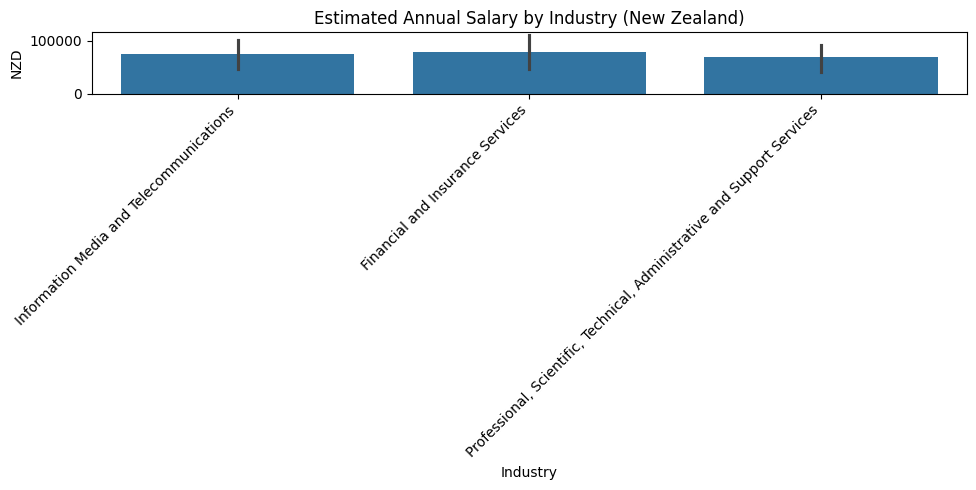

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(
    data=final_df,
    x="Series_title_1",
    y="estimated_annual_salary_nzd"
)
plt.xticks(rotation=45, ha="right")
plt.title("Estimated Annual Salary by Industry (New Zealand)")
plt.ylabel("NZD")
plt.xlabel("Industry")
plt.tight_layout()
plt.show()

Professional and technology-focused industries show higher estimated annual earnings compared to other sectors, which helps explain why these roles remain attractive despite rising living costs.


To complement earnings analysis, a national cost-of-living index is used as contextual information.
The goal is not to calculate exact affordability, but to understand earnings strength relative to rising living costs.


In [75]:
# Approximate national cost-of-living index (NZ average baseline)
cost_of_living_index = 100

final_df["salary_to_cost_ratio"] = (
    final_df["estimated_annual_salary_nzd"] / cost_of_living_index
)

final_df[[
    "Series_title_1",
    "estimated_annual_salary_nzd",
    "salary_to_cost_ratio"
]]

,Series_title_1,estimated_annual_salary_nzd,salary_to_cost_ratio
11691,Information Media and Telecommunications,119641.6,1196.416
11839,Information Media and Telecommunications,132059.2,1320.592
11987,Information Media and Telecommunications,119766.4,1197.664
13023,Financial and Insurance Services,131726.4,1317.264
13171,Financial and Insurance Services,147326.4,1473.264
13319,Financial and Insurance Services,131788.8,1317.888
15687,"Professional, Scientific, Technical, Administr...",103480.0,1034.800
15835,"Professional, Scientific, Technical, Administr...",104956.8,1049.568
15983,"Professional, Scientific, Technical, Administr...",103480.0,1034.800
103097,Information Media and Telecommunications,79206.4,792.064


In [76]:
trend_df = hourly_df[
    hourly_df["Series_title_1"].isin([
        "Information Media and Telecommunications",
        "Professional, Scientific, Technical, Administrative and Support Services"
    ])
]

trend_df["estimated_annual_salary_nzd"] = trend_df["Data_value"] * 40 * 52

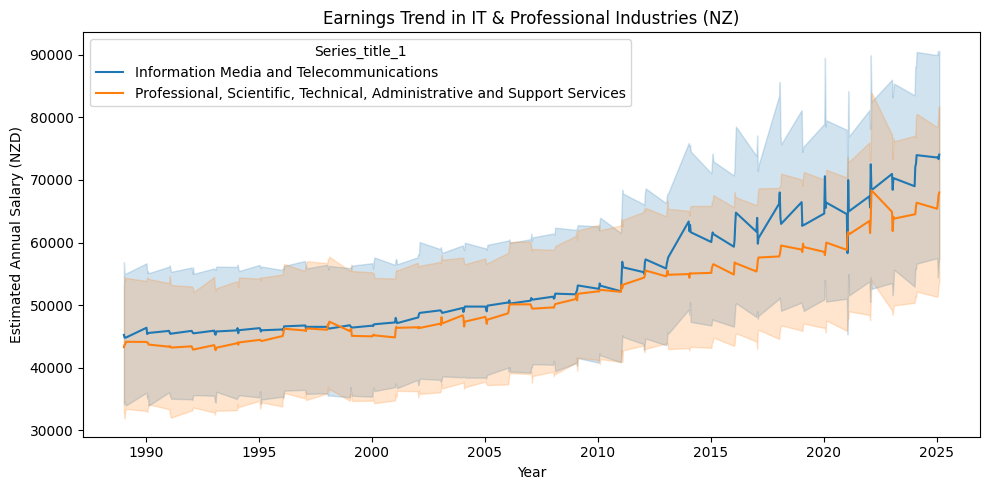

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=trend_df,
    x="Period",
    y="estimated_annual_salary_nzd",
    hue="Series_title_1"
)
plt.title("Earnings Trend in IT & Professional Industries (NZ)")
plt.ylabel("Estimated Annual Salary (NZD)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

Earnings in IT and professional service industries show a steady upward trend over time,
indicating stronger resilience to economic pressure compared to many traditional sectors.


## Cost of Living Analysis (Contextual)

The cost-of-living dataset is analysed separately due to differences in data granularity.
While earnings data is available at the industry level, cost-of-living data is provided
as an aggregate index. For this reason, the dataset is used to provide economic context
rather than direct numerical comparison.


In [79]:
# Load cost of living dataset
cost_df = pd.read_csv("../data/household-living-costs-price-indexes-december-2024-quarter-time-series-indexes.csv", low_memory=False)

cost_df.head()


,hlpi_name,series_ref,quarter,hlpi,nzhec,nzhec_name,nzhec_short,level,index,change.q,change.a
0,All households,HPIQ.SALL01,2008Q2,allhh,1,Food,Food,group,870,NaN,NaN
1,All households,HPIQ.SALL01,2008Q3,allhh,1,Food,Food,group,903,3.8,NaN
2,All households,HPIQ.SALL01,2008Q4,allhh,1,Food,Food,group,918,1.7,NaN
3,All households,HPIQ.SALL01,2009Q1,allhh,1,Food,Food,group,927,1.0,NaN
4,All households,HPIQ.SALL01,2009Q2,allhh,1,Food,Food,group,935,0.9,7.5


In [80]:
cost_df.shape, cost_df.columns


((57218, 11),
 Index(['hlpi_name', 'series_ref', 'quarter', 'hlpi', 'nzhec', 'nzhec_name',
        'nzhec_short', 'level', 'index', 'change.q', 'change.a'],
       dtype='str'))

The cost-of-living data was explored to understand overall economic pressure in New Zealand.
Due to structural differences from earnings data, it is not merged directly but interpreted
alongside earnings trends.


In [82]:
cost_df.head()

,hlpi_name,series_ref,quarter,hlpi,nzhec,nzhec_name,nzhec_short,level,index,change.q,change.a
0,All households,HPIQ.SALL01,2008Q2,allhh,1,Food,Food,group,870,NaN,NaN
1,All households,HPIQ.SALL01,2008Q3,allhh,1,Food,Food,group,903,3.8,NaN
2,All households,HPIQ.SALL01,2008Q4,allhh,1,Food,Food,group,918,1.7,NaN
3,All households,HPIQ.SALL01,2009Q1,allhh,1,Food,Food,group,927,1.0,NaN
4,All households,HPIQ.SALL01,2009Q2,allhh,1,Food,Food,group,935,0.9,7.5


In [83]:
cost_df.columns

Index(['hlpi_name', 'series_ref', 'quarter', 'hlpi', 'nzhec', 'nzhec_name',
       'nzhec_short', 'level', 'index', 'change.q', 'change.a'],
      dtype='str')

In [84]:
cost_df["hlpi_name"].value_counts().head(10)

hlpi_name
All households                   4087
Beneficiary                      4087
Expenditure quintile 1 (low)     4087
Expenditure quintile 2           4087
Expenditure quintile 3           4087
Expenditure quintile 4           4087
Expenditure quintile 5 (high)    4087
Income quintile 1 (low)          4087
Income quintile 2                4087
Income quintile 3                4087
Name: count, dtype: int64

In [85]:
cost_all = cost_df[
    cost_df["hlpi_name"]
    .str.contains("All", case=False, na=False)
]

cost_all.shape

(4087, 11)

In [86]:
cost_all = cost_all.sort_values("quarter")

In [92]:
cost_all = cost_all.copy()

cost_all["year"] = cost_all["quarter"].str[:4].astype(int)
cost_all["q"] = cost_all["quarter"].str[-1].astype(int)


In [93]:
quarter_to_month = {
    1: 3,   # Q1 → March
    2: 6,   # Q2 → June
    3: 9,   # Q3 → September
    4: 12   # Q4 → December
}

cost_all["month"] = cost_all["q"].map(quarter_to_month)

In [94]:
cost_all["date"] = pd.to_datetime(
    dict(year=cost_all["year"], month=cost_all["month"], day=1)
)

cost_all = cost_all.sort_values("date")

In [95]:
cost_all[["quarter", "date"]].head()

,quarter,date
0,2008Q2,2008-06-01
3149,2008Q2,2008-06-01
2948,2008Q2,2008-06-01
1139,2008Q2,2008-06-01
871,2008Q2,2008-06-01


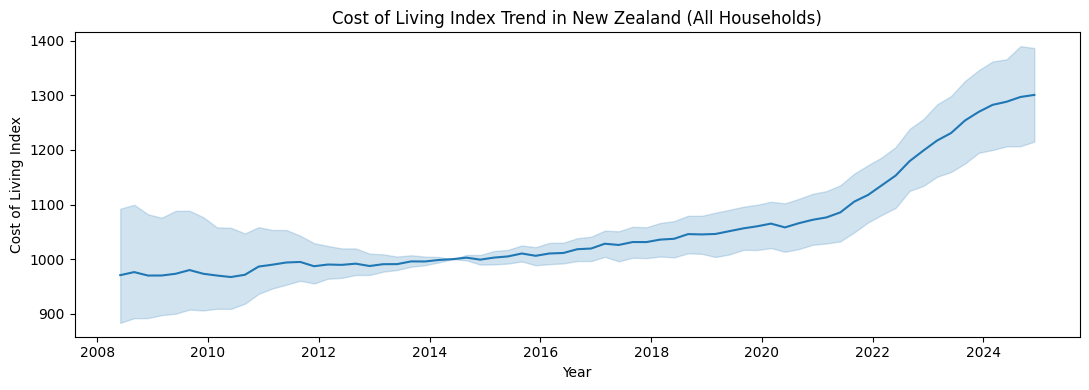

In [96]:
plt.figure(figsize=(11,4))

sns.lineplot(
    data=cost_all,
    x="date",
    y="index"
)

plt.title("Cost of Living Index Trend in New Zealand (All Households)")
plt.xlabel("Year")
plt.ylabel("Cost of Living Index")

plt.tight_layout()
plt.show()

Quarter values were stored as strings (e.g. 2008Q2), so they were parsed into year and quarter
components and converted into a datetime format for proper time-series visualisation.